In [60]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.preprocessing
import torch
import torchvision
import torchvision.datasets
import torchvision.models
import torchvision.transforms

In [10]:
numeros = sklearn.datasets.load_digits()
imagenes = numeros['images']  # Hay 1797 digitos representados en imagenes 8x8
n_imagenes = len(imagenes)
X = imagenes.copy()
Y = numeros['target']
print(np.shape(X))

(1797, 8, 8)


In [11]:
inputs = torch.autograd.Variable(torch.Tensor(X).float()).unsqueeze(1)
print(inputs.size())

torch.Size([1797, 1, 8, 8])


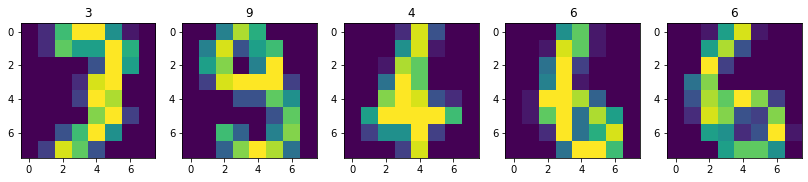

In [12]:
# muestra algunos ejemplos

n_items = inputs.data.size()[0]
random_items = np.random.choice(np.arange(n_items), 5)

plt.figure(figsize=(14,5))
for i in range(5):
    plt.subplot(1,5,i+1)
    item  = random_items[i]
    plt.imshow(inputs[item][0].detach().numpy())
    plt.title(Y[item])

In [13]:
# normaliza
mean = inputs.mean(dim=0)
std = inputs.std(dim=0)
std[std==0]=1.0

for i in range(len(inputs)):
    inputs[i] = (inputs[i])/std
np.shape(inputs)


torch.Size([1797, 1, 8, 8])

In [14]:
# define el autoencoder
class Autoencoder(torch.nn.Module):
    def __init__(self):
        super(Autoencoder,self).__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Conv2d(1, 16, kernel_size=3),
            torch.nn.Conv2d(16,8,kernel_size=3),
            torch.nn.Conv2d(8,4,kernel_size=3))
        self.decoder = torch.nn.Sequential(
            torch.nn.ConvTranspose2d(4,8,kernel_size=3),
            torch.nn.ConvTranspose2d(8,16,kernel_size=3),
            torch.nn.ConvTranspose2d(16,1,kernel_size=3))
    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [41]:
# define el autoencoder
class Autoencoder(torch.nn.Module):
    def __init__(self,k1, k2, k3):
        super(Autoencoder,self).__init__()
        #k1=16; k2=8; k3=4
        self.k1=k1
        self.k2=k2
        self.k3=k3
        self.encoder = torch.nn.Sequential(
            torch.nn.Conv2d(1, k1, kernel_size=3),
            torch.nn.Conv2d(k1,k2,kernel_size=3),
            torch.nn.Conv2d(k2,k3,kernel_size=3))
        self.decoder = torch.nn.Sequential(
            torch.nn.ConvTranspose2d(k3,k2,kernel_size=3),
            torch.nn.ConvTranspose2d(k2,k1,kernel_size=3),
            torch.nn.ConvTranspose2d(k1,1,kernel_size=3))
    def forward(self,x,k1, k2, k3):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [65]:
# entrenamiento
# inicializa modelo, loss y optimizador
k1=16
k2_tot=[4,8,12]
#k3=4
latent_space=np.linspace(2.,12.,6)
n_c_tot=[]
loss_tot=[]
for k2 in k2_tot:
    for k3 in latent_space:
        num_epochs = 100
        model = Autoencoder(k1,int(k2),int(k3))
        print(model)
        distance = torch.nn.MSELoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=1E-4)
        loss_list = [] 
        for epoch in range(num_epochs):
            output = model(inputs,k1,8,4)
            loss = distance(output, inputs)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            loss_list.append(loss.item())
            #print('epoch [{}/{}], loss:{:.4f}'.format(epoch+1, num_epochs, loss.item()))
        loss_tot.append(loss_list[-1])
        #type(loss.item())
        n_c=0
        for m in model.parameters():
            n_c+=m.flatten().size()[0]
        n_c_tot.append(n_c)
        print(n_c)


Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): Conv2d(16, 4, kernel_size=(3, 3), stride=(1, 1))
    (2): Conv2d(4, 2, kernel_size=(3, 3), stride=(1, 1))
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(2, 4, kernel_size=(3, 3), stride=(1, 1))
    (1): ConvTranspose2d(4, 16, kernel_size=(3, 3), stride=(1, 1))
    (2): ConvTranspose2d(16, 1, kernel_size=(3, 3), stride=(1, 1))
  )
)
epoch [1/100], loss:2.4505
epoch [2/100], loss:2.3610
epoch [3/100], loss:2.2170
epoch [4/100], loss:2.0661
epoch [5/100], loss:1.9105
epoch [6/100], loss:1.7236
epoch [7/100], loss:1.5333
epoch [8/100], loss:1.5055
epoch [9/100], loss:1.5516
epoch [10/100], loss:1.4147
epoch [11/100], loss:1.3023
epoch [12/100], loss:1.2611
epoch [13/100], loss:1.2444
epoch [14/100], loss:1.2235
epoch [15/100], loss:1.1938
epoch [16/100], loss:1.1604
epoch [17/100], loss:1.1305
epoch [18/100], loss:1.1083
epoch [19/100], loss:1.0902
epoch [20/100], loss:1.0681
epo

epoch [47/100], loss:0.7413
epoch [48/100], loss:0.7368
epoch [49/100], loss:0.7321
epoch [50/100], loss:0.7267
epoch [51/100], loss:0.7219
epoch [52/100], loss:0.7177
epoch [53/100], loss:0.7129
epoch [54/100], loss:0.7075
epoch [55/100], loss:0.7023
epoch [56/100], loss:0.6974
epoch [57/100], loss:0.6925
epoch [58/100], loss:0.6876
epoch [59/100], loss:0.6832
epoch [60/100], loss:0.6791
epoch [61/100], loss:0.6751
epoch [62/100], loss:0.6710
epoch [63/100], loss:0.6669
epoch [64/100], loss:0.6629
epoch [65/100], loss:0.6591
epoch [66/100], loss:0.6554
epoch [67/100], loss:0.6518
epoch [68/100], loss:0.6484
epoch [69/100], loss:0.6450
epoch [70/100], loss:0.6414
epoch [71/100], loss:0.6379
epoch [72/100], loss:0.6346
epoch [73/100], loss:0.6313
epoch [74/100], loss:0.6279
epoch [75/100], loss:0.6245
epoch [76/100], loss:0.6211
epoch [77/100], loss:0.6177
epoch [78/100], loss:0.6145
epoch [79/100], loss:0.6113
epoch [80/100], loss:0.6082
epoch [81/100], loss:0.6054
epoch [82/100], loss

epoch [1/100], loss:1.8357
epoch [2/100], loss:1.6435
epoch [3/100], loss:1.4445
epoch [4/100], loss:1.5390
epoch [5/100], loss:1.3253
epoch [6/100], loss:1.3439
epoch [7/100], loss:1.3269
epoch [8/100], loss:1.2409
epoch [9/100], loss:1.1369
epoch [10/100], loss:1.0946
epoch [11/100], loss:1.1031
epoch [12/100], loss:1.0441
epoch [13/100], loss:1.0045
epoch [14/100], loss:0.9989
epoch [15/100], loss:0.9902
epoch [16/100], loss:0.9712
epoch [17/100], loss:0.9465
epoch [18/100], loss:0.9231
epoch [19/100], loss:0.9061
epoch [20/100], loss:0.8918
epoch [21/100], loss:0.8749
epoch [22/100], loss:0.8589
epoch [23/100], loss:0.8505
epoch [24/100], loss:0.8481
epoch [25/100], loss:0.8430
epoch [26/100], loss:0.8283
epoch [27/100], loss:0.8069
epoch [28/100], loss:0.7861
epoch [29/100], loss:0.7703
epoch [30/100], loss:0.7592
epoch [31/100], loss:0.7487
epoch [32/100], loss:0.7362
epoch [33/100], loss:0.7232
epoch [34/100], loss:0.7128
epoch [35/100], loss:0.7049
epoch [36/100], loss:0.6971
e

epoch [63/100], loss:0.6884
epoch [64/100], loss:0.6837
epoch [65/100], loss:0.6793
epoch [66/100], loss:0.6747
epoch [67/100], loss:0.6699
epoch [68/100], loss:0.6651
epoch [69/100], loss:0.6601
epoch [70/100], loss:0.6549
epoch [71/100], loss:0.6500
epoch [72/100], loss:0.6452
epoch [73/100], loss:0.6405
epoch [74/100], loss:0.6361
epoch [75/100], loss:0.6322
epoch [76/100], loss:0.6284
epoch [77/100], loss:0.6251
epoch [78/100], loss:0.6221
epoch [79/100], loss:0.6193
epoch [80/100], loss:0.6166
epoch [81/100], loss:0.6141
epoch [82/100], loss:0.6115
epoch [83/100], loss:0.6090
epoch [84/100], loss:0.6067
epoch [85/100], loss:0.6043
epoch [86/100], loss:0.6020
epoch [87/100], loss:0.5998
epoch [88/100], loss:0.5975
epoch [89/100], loss:0.5953
epoch [90/100], loss:0.5931
epoch [91/100], loss:0.5910
epoch [92/100], loss:0.5890
epoch [93/100], loss:0.5871
epoch [94/100], loss:0.5853
epoch [95/100], loss:0.5837
epoch [96/100], loss:0.5821
epoch [97/100], loss:0.5806
epoch [98/100], loss

epoch [8/100], loss:1.2403
epoch [9/100], loss:1.1208
epoch [10/100], loss:1.0635
epoch [11/100], loss:1.0441
epoch [12/100], loss:0.9830
epoch [13/100], loss:0.9433
epoch [14/100], loss:0.9472
epoch [15/100], loss:0.9254
epoch [16/100], loss:0.8909
epoch [17/100], loss:0.8737
epoch [18/100], loss:0.8657
epoch [19/100], loss:0.8510
epoch [20/100], loss:0.8300
epoch [21/100], loss:0.8099
epoch [22/100], loss:0.7950
epoch [23/100], loss:0.7885
epoch [24/100], loss:0.7865
epoch [25/100], loss:0.7801
epoch [26/100], loss:0.7650
epoch [27/100], loss:0.7457
epoch [28/100], loss:0.7306
epoch [29/100], loss:0.7220
epoch [30/100], loss:0.7154
epoch [31/100], loss:0.7078
epoch [32/100], loss:0.6990
epoch [33/100], loss:0.6883
epoch [34/100], loss:0.6765
epoch [35/100], loss:0.6667
epoch [36/100], loss:0.6599
epoch [37/100], loss:0.6524
epoch [38/100], loss:0.6425
epoch [39/100], loss:0.6334
epoch [40/100], loss:0.6256
epoch [41/100], loss:0.6169
epoch [42/100], loss:0.6077
epoch [43/100], loss:0

epoch [69/100], loss:0.7666
epoch [70/100], loss:0.7653
epoch [71/100], loss:0.7641
epoch [72/100], loss:0.7631
epoch [73/100], loss:0.7620
epoch [74/100], loss:0.7610
epoch [75/100], loss:0.7599
epoch [76/100], loss:0.7587
epoch [77/100], loss:0.7574
epoch [78/100], loss:0.7564
epoch [79/100], loss:0.7554
epoch [80/100], loss:0.7545
epoch [81/100], loss:0.7536
epoch [82/100], loss:0.7526
epoch [83/100], loss:0.7516
epoch [84/100], loss:0.7507
epoch [85/100], loss:0.7498
epoch [86/100], loss:0.7490
epoch [87/100], loss:0.7482
epoch [88/100], loss:0.7474
epoch [89/100], loss:0.7466
epoch [90/100], loss:0.7458
epoch [91/100], loss:0.7450
epoch [92/100], loss:0.7442
epoch [93/100], loss:0.7435
epoch [94/100], loss:0.7428
epoch [95/100], loss:0.7421
epoch [96/100], loss:0.7413
epoch [97/100], loss:0.7406
epoch [98/100], loss:0.7399
epoch [99/100], loss:0.7392
epoch [100/100], loss:0.7385
4235
Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
  

epoch [14/100], loss:0.9132
epoch [15/100], loss:0.9059
epoch [16/100], loss:0.8753
epoch [17/100], loss:0.8588
epoch [18/100], loss:0.8489
epoch [19/100], loss:0.8198
epoch [20/100], loss:0.7791
epoch [21/100], loss:0.7553
epoch [22/100], loss:0.7435
epoch [23/100], loss:0.7260
epoch [24/100], loss:0.7143
epoch [25/100], loss:0.7110
epoch [26/100], loss:0.7028
epoch [27/100], loss:0.6872
epoch [28/100], loss:0.6758
epoch [29/100], loss:0.6642
epoch [30/100], loss:0.6488
epoch [31/100], loss:0.6367
epoch [32/100], loss:0.6260
epoch [33/100], loss:0.6130
epoch [34/100], loss:0.6029
epoch [35/100], loss:0.5963
epoch [36/100], loss:0.5862
epoch [37/100], loss:0.5765
epoch [38/100], loss:0.5697
epoch [39/100], loss:0.5618
epoch [40/100], loss:0.5529
epoch [41/100], loss:0.5454
epoch [42/100], loss:0.5395
epoch [43/100], loss:0.5337
epoch [44/100], loss:0.5277
epoch [45/100], loss:0.5220
epoch [46/100], loss:0.5165
epoch [47/100], loss:0.5110
epoch [48/100], loss:0.5059
epoch [49/100], loss

epoch [75/100], loss:0.4492
epoch [76/100], loss:0.4454
epoch [77/100], loss:0.4419
epoch [78/100], loss:0.4384
epoch [79/100], loss:0.4350
epoch [80/100], loss:0.4316
epoch [81/100], loss:0.4282
epoch [82/100], loss:0.4248
epoch [83/100], loss:0.4215
epoch [84/100], loss:0.4183
epoch [85/100], loss:0.4151
epoch [86/100], loss:0.4119
epoch [87/100], loss:0.4086
epoch [88/100], loss:0.4055
epoch [89/100], loss:0.4024
epoch [90/100], loss:0.3994
epoch [91/100], loss:0.3963
epoch [92/100], loss:0.3933
epoch [93/100], loss:0.3904
epoch [94/100], loss:0.3874
epoch [95/100], loss:0.3845
epoch [96/100], loss:0.3816
epoch [97/100], loss:0.3787
epoch [98/100], loss:0.3758
epoch [99/100], loss:0.3730
epoch [100/100], loss:0.3702
6405


Text(0, 0.5, 'Final Loss')

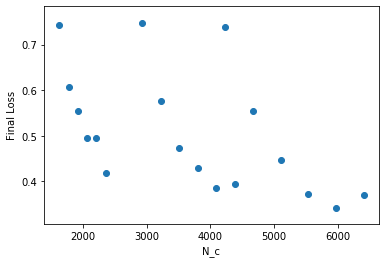

In [69]:
plt.scatter(n_c_tot,loss_tot)
plt.xlabel("N_c")
plt.ylabel("Final Loss")

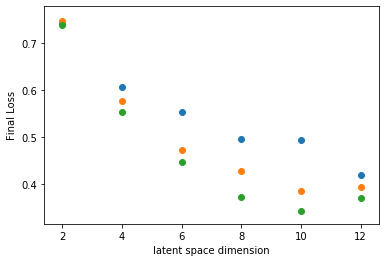

In [79]:
loss_tot_2=np.reshape(loss_tot,(len(k2_tot),len(latent_space)))
for i in range(len(k2_tot)):
    plt.scatter(latent_space,loss_tot_2[i])
    plt.xlabel("latent space dimension")
    plt.ylabel("Final Loss")

In [72]:
print(loss_tot)
print(np.shape(loss_tot))

[0.743791937828064, 0.6061093211174011, 0.553595244884491, 0.496293842792511, 0.49442926049232483, 0.41922450065612793, 0.7481423020362854, 0.5762675404548645, 0.47340208292007446, 0.4285660684108734, 0.38566291332244873, 0.3936278223991394, 0.738466203212738, 0.5538272857666016, 0.447945237159729, 0.37185654044151306, 0.34239140152931213, 0.37015292048454285]
(18,)


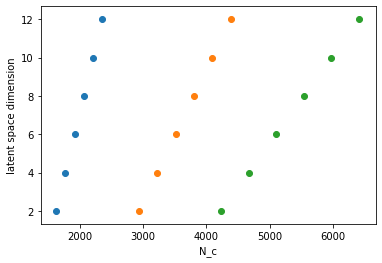

In [82]:
n_c_2=np.reshape(n_c_tot,(len(k2_tot),len(latent_space)))
for i in range(len(k2_tot)):
    plt.scatter(n_c_2[i],latent_space)
    plt.xlabel("N_c")
    plt.ylabel("latent space dimension")